In [4]:
import mlrose_hiive
from mlrose_hiive import GeomDecay
'''
from utility import plot_randomized_optimization_curve,
plot_ro_algorithm_compare, \
 plot_mean_time_compare, plot_converged_fitness_compare
from dataset import get_coords_list
'''

import numpy as np
import time
question = "Travel Salesman"
num_points = 10
seed = 77

from mlrose_hiive.generators import TSPGenerator
problem = TSPGenerator.generate(seed, num_points)
dir(problem)
fitness_coords = mlrose_hiive.TravellingSales(coords=problem.coords)
problem = mlrose_hiive.TSPOpt(length=num_points, fitness_fn=fitness_coords, maximize=False)
iters = [1, 3, 5, 7, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]
iters.extend([i for i in range(200, 1200, 50)])
fitness_list = []
all_best_fitness = None
all_best_restart = None
for i in [0, 25, 75, 100]:
    fitness_iter = []
    for iter in iters:
        best_state, best_fitness, best_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                                                            max_attempts = 10, 
                                                                                            max_iters=iter, 
                                                                                            curve=True, 
                                                                                            random_state=42,
                                                                                            restarts = i)
        fitness_iter.append(best_fitness)
        if not all_best_fitness:
            all_best_fitness = best_fitness
            all_best_restart = i
        elif best_fitness > all_best_fitness:
            all_best_fitness = best_fitness
            all_best_restart = i
        print("Travel Salesman Random Hill Climbing init_temp Fitness {}".format(best_fitness))
    fitness_list.append(fitness_iter)
    mean_accuracy = np.mean(fitness_iter)
    print("Travel Salesman Random Hill Climbing init_temp Fitness {} restart = {} best_fitness_curve".format(
        best_fitness, all_best_restart))
        
        
        
    
    
'''
# get 10 random coords list
coords = get_coords_list(seed, num_points)
print("Traveling Salesman Coordination List: {}".format(coords))
# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords=coords)
# initialize a TSPOpt() object with the length of the problem (i.e. the number
of cities to be visited on the tour)
# and whether our problem is a maximization or a minimization problem.
problem = mlrose.TSPOpt(length=num_points, fitness_fn=fitness_coords,
maximize=False)
# define parameters
iters = [1, 3, 5, 7, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]
iters.extend([i for i in range(200, 1200, 50)])
# randomized hill climbing
# simulated annealing
def train_tsp_sa():
 algorithm = "Simulated Annealing"
 question = "Travel Salesman"
 params = {"init_temp": [0.5, 10, 100], "decay": [0.01, 0.5, 0.99]}
 params_names = ["init_temp", "decay"]
 params_values = [[0.5, 10, 100], [0.01, 0.5, 0.99]]
 iters = [1, 3, 5, 7, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90,
100]
'''

Travel Salesman Random Hill Climbing init_temp Fitness 1116.63036066889
Travel Salesman Random Hill Climbing init_temp Fitness 1116.63036066889
Travel Salesman Random Hill Climbing init_temp Fitness 1116.63036066889
Travel Salesman Random Hill Climbing init_temp Fitness 1116.63036066889
Travel Salesman Random Hill Climbing init_temp Fitness 1054.7053118113895
Travel Salesman Random Hill Climbing init_temp Fitness 1054.7053118113895
Travel Salesman Random Hill Climbing init_temp Fitness 1054.7053118113895
Travel Salesman Random Hill Climbing init_temp Fitness 990.4696053926884
Travel Salesman Random Hill Climbing init_temp Fitness 848.1107251737112
Travel Salesman Random Hill Climbing init_temp Fitness 848.1107251737112
Travel Salesman Random Hill Climbing init_temp Fitness 848.1107251737112
Travel Salesman Random Hill Climbing init_temp Fitness 848.1107251737112
Travel Salesman Random Hill Climbing init_temp Fitness 848.1107251737112
Travel Salesman Random Hill Climbing init_temp Fitne

'\n# get 10 random coords list\ncoords = get_coords_list(seed, num_points)\nprint("Traveling Salesman Coordination List: {}".format(coords))\n# Initialize fitness function object using coords_list\nfitness_coords = mlrose.TravellingSales(coords=coords)\n# initialize a TSPOpt() object with the length of the problem (i.e. the number\nof cities to be visited on the tour)\n# and whether our problem is a maximization or a minimization problem.\nproblem = mlrose.TSPOpt(length=num_points, fitness_fn=fitness_coords,\nmaximize=False)\n# define parameters\niters = [1, 3, 5, 7, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]\niters.extend([i for i in range(200, 1200, 50)])\n# randomized hill climbing\n# simulated annealing\ndef train_tsp_sa():\n algorithm = "Simulated Annealing"\n question = "Travel Salesman"\n params = {"init_temp": [0.5, 10, 100], "decay": [0.01, 0.5, 0.99]}\n params_names = ["init_temp", "decay"]\n params_values = [[0.5, 10, 100], [0.01, 0.5, 0.99]]\n iters = [1, 3

In [5]:
# simulated annealing
def train_tsp_sa():
    algorithm = "Simulated Annealing"
    question = "Travel Salesman"
    params = {"init_temp": [0.5, 10, 100], "decay": [0.01, 0.5, 0.99]}
    params_names = ["init_temp", "decay"]
    params_values = [[0.5, 10, 100], [0.01, 0.5, 0.99]]
    iters = [1, 3, 5, 7, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]
    iters.extend([i for i in range(200, 1200, 50)])
    fitness_list = []
    for k, v in params.items():
        for v_par in v:
            fitness_iter = []
            # Simulated Annealing
            if k == "init_temp":
                for iter in iters:
                    schedule = mlrose_hiive.GeomDecay(init_temp=v_par, decay=0.99, min_temp=0.001)
                    best_state, best_fitness, best_fitness_curve = mlrose_hiive.simulated_annealing(problem,max_attempts=10,
                                                                                max_iters=iter,
                                                                          random_state=seed,schedule=schedule)
                    fitness_iter.append(best_fitness)
                    print("Travel Salesman Simulated Annealing init_temp Fitness {}".format(best_fitness))
            elif k == "decay":
                for iter in iters:
                    best_state, best_fitness, best_fitness_curve = mlrose_hiive.simulated_annealing(problem,max_attempts=10,
                    max_iters=iter,random_state=seed,schedule=GeomDecay(decay=v_par))
                    fitness_iter.append(best_fitness)
                    print("Travel Salesman Simulated Annealing decay Fitness {}".format(best_fitness))
                fitness_list.append(fitness_iter)
                print("Travel Salesman Simulated Annealing Fitness List:\n{}".format(fitness_list))
                #plot_randomized_optimization_curve(question, fitness_list, algorithm, params_names, params_values, iters)
                    

In [5]:
train_tsp_sa()

Travel Salesman Simulated Annealing init_temp Fitness 928.5723171717996
Travel Salesman Simulated Annealing init_temp Fitness 928.5723171717996
Travel Salesman Simulated Annealing init_temp Fitness 901.3351892924659
Travel Salesman Simulated Annealing init_temp Fitness 901.3351892924659
Travel Salesman Simulated Annealing init_temp Fitness 901.3351892924659
Travel Salesman Simulated Annealing init_temp Fitness 897.0039839297348
Travel Salesman Simulated Annealing init_temp Fitness 879.7574624444723
Travel Salesman Simulated Annealing init_temp Fitness 879.7574624444723
Travel Salesman Simulated Annealing init_temp Fitness 879.7574624444723
Travel Salesman Simulated Annealing init_temp Fitness 879.7574624444723
Travel Salesman Simulated Annealing init_temp Fitness 879.7574624444723
Travel Salesman Simulated Annealing init_temp Fitness 879.7574624444723
Travel Salesman Simulated Annealing init_temp Fitness 879.7574624444723
Travel Salesman Simulated Annealing init_temp Fitness 879.757462

In [6]:
# genetic algorithm
def train_tsp_ga():
    algorithm = "Genetic"
    params = {"pop_size": [10, 100, 1000], "mutation_prob": [0.1, 0.5, 1.0]}
    params_names = ["pop_size", "mutation_prob"]
    params_values = [[10, 100, 1000], [0.1, 0.5, 1.0]]
    fitness_list = []
    # iters = [1, 3, 5, 7, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]
    for k, v in params.items():
        for v_par in v:
            fitness_iter = []
            # Simulated Annealing
            if k == "pop_size":
                for iter in iters:
                    best_state, best_fitness, best_fitness_curve  = mlrose_hiive.genetic_alg(problem,max_attempts=10,max_iters=iter,
                                                                        random_state=seed,pop_size=v_par)
                    fitness_iter.append(best_fitness)
                    print("Travel Salesman Genetic Algorithm pop_size Fitness   {}".format(best_fitness))
            elif k == "mutation_prob":
                for iter in iters:
                    best_state, best_fitness, best_fitness_curve = mlrose_hiive.genetic_alg(problem,max_attempts=10,max_iters=iter,
                                                                  random_state=seed,mutation_prob=v_par)
                    fitness_iter.append(best_fitness)
                    print("Travel Salesman Genetic Algorithm mutation_prob Fitness {}".format(best_fitness))
                    fitness_list.append(fitness_iter)
    print("Travel Salesman Genetic Algorithm Fitness List:\n{}".format(fitness_list))
    #plot_randomized_optimization_curve(question, fitness_list, algorithm, params_names, params_values, iters)
                    

In [8]:
train_tsp_ga()

Travel Salesman Genetic Algorithm pop_size Fitness   1065.5842271257652
Travel Salesman Genetic Algorithm pop_size Fitness   946.3431938237908
Travel Salesman Genetic Algorithm pop_size Fitness   946.3431938237908
Travel Salesman Genetic Algorithm pop_size Fitness   934.3223945504832
Travel Salesman Genetic Algorithm pop_size Fitness   934.3223945504832
Travel Salesman Genetic Algorithm pop_size Fitness   934.3223945504832
Travel Salesman Genetic Algorithm pop_size Fitness   934.3223945504832
Travel Salesman Genetic Algorithm pop_size Fitness   934.3223945504832
Travel Salesman Genetic Algorithm pop_size Fitness   934.3223945504832
Travel Salesman Genetic Algorithm pop_size Fitness   934.3223945504832
Travel Salesman Genetic Algorithm pop_size Fitness   934.3223945504832
Travel Salesman Genetic Algorithm pop_size Fitness   934.3223945504832
Travel Salesman Genetic Algorithm pop_size Fitness   934.3223945504832
Travel Salesman Genetic Algorithm pop_size Fitness   934.3223945504832
Trave

In [7]:
# MIMIC
def train_tsp_mimic():
    algorithm = "MIMIC"
    params = {"pop_size": [10, 100, 1000], "keep_pct": [0.1, 0.5, 1.0]}
    params_names = ["pop_size", "keep_pct"]
    params_values = [[10, 100, 1000], [0.1, 0.5, 1.0]]
    fitness_list = []
    for k, v in params.items():
        for v_par in v:
            fitness_iter = []
            # Simulated Annealing
            if k == "pop_size":
                for iter in iters:
                    best_state, best_fitness, best_fitness_curve = mlrose_hiive.mimic(problem, max_attempts=10,max_iters=iter,
                                                                  random_state=seed,pop_size=v_par)
                    fitness_iter.append(best_fitness)
                    print("Travel Salesman MIMIC Algorithm pop_size Fitness{}".format(best_fitness))
            elif k == "keep_pct":
                for iter in iters:
                    best_state, best_fitness, best_fitness_curve = mlrose_hiive.mimic(problem, max_attempts=10,max_iters=iter,random_state=seed,
                                                            keep_pct=v_par)
                    fitness_iter.append(best_fitness)
        print("Travel Salesman MIMIC Algorithm keep_pct Fitness {}".format(best_fitness))
        fitness_list.append(fitness_iter)
    print("Travel Salesman MIMIC Algorithm Fitness List:\n{}".format(fitness_list))
    #plot_randomized_optimization_curve(question, fitness_list, algorithm, params_names, params_values, iters)

In [8]:
train_tsp_mimic()

Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.9123457565183
Travel Salesman MIMIC Algorithm pop_size Fitness1020.912345756

In [16]:
OUTFILE = './Algorithms_LOG.txt'
def write_to_file(algorithm, mean_accuracy, mean_time):
    with open(OUTFILE, 'a+') as f:
        f.write('{},{},{}\n'.format(algorithm, mean_accuracy, mean_time))
        

        
# compare RHC, SA, GA, MIMIC
def tsp_algorithm_comparison():
    optimized_params = {"init_temp": 10, "decay": 0.99, "pop_size": 10, "mutation_prob": 0.1, "keep_pct": 1}
    algorithms = ["random_hill_climb", "simulated_annealing", "genetic_alg", "MIMIC"]
    new_iters = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90]
    new_iters.extend([i for i in range(100, 3000, 50)])
    # new_iters= [1, 3]
   
    with open(OUTFILE, 'w') as f:
        f.write('{},{},{}\n'.format('Algorithm', 'Max Fitness', 'Mean Running Time'))
    
    fitness_list = []
    running_time_list = []
    mean_fitness_list = []
    mean_running_time_list = []
    rhc_fitness_list = []
    ga_fitness_list = []
    sa_fitness_list = []
    mimic_fitness_list = []
    rhc_time_list = []
    ga_time_list = []
    sa_time_list = []
    mimic_time_list = []
    for algorithm in algorithms:
        fitness_iter = []
        time_iter = []
        mean_time = 0
        mean_accuracy = 0
        # RHC
        if algorithm == "random_hill_climb":
            for iter in new_iters:
                start_time = time.time()
                best_state, best_fitness, best_fitness_curve = mlrose_hiive.random_hill_climb(problem,
                                                                                              max_attempts=10,
                                                                                              max_iters=iter,
                                                                                              random_state=seed)
                end_time = time.time()
                train_time = end_time - start_time
                fitness_iter.append(best_fitness)
                time_iter.append(train_time)
                #print("Travel Salesman RHC Algorithm Fitness {}, Time {}".format(best_fitness, train_time))
                
                # mean_accuracy = np.mean(fitness_iter)
                #write_to_file("random_hill_climb", mean_time, mean_accuracy)
                rhc_fitness_list.append(fitness_iter)
                running_time_list.append(time_iter)
                rhc_time_list.append(train_time)

                # SA
        elif algorithm == "simulated_annealing":
            for iter in new_iters:
                start_time = time.time()
                schedule = mlrose_hiive.GeomDecay(init_temp=optimized_params["init_temp"],
                decay=optimized_params["decay"])
                best_state, best_fitness, best_fitness_curve = mlrose_hiive.simulated_annealing(problem,
                                                                                                max_attempts=10,
                                                                                                max_iters=iter,
                                                                                                random_state=seed,
                                                                                                schedule=schedule)
                end_time = time.time()
                train_time = end_time - start_time
                fitness_iter.append(best_fitness)
                time_iter.append(train_time)
                #print("Travel Salesman SA Algorithm Fitness {}, Time {}".format(best_fitness, train_time))
                mean_time = np.mean(time_iter)
                # mean_accuracy = np.mean(fitness_iter)
                #write_to_file("simulated_annealing", mean_time, mean_accuracy)
                sa_fitness_list.append(fitness_iter)
                running_time_list.append(time_iter)
                sa_time_list.append(train_time)
                # GA
        elif algorithm == "genetic_alg":
            for iter in new_iters:
                start_time = time.time()
                best_state, best_fitness, best_fitness_curve = mlrose_hiive.genetic_alg(problem, max_attempts=10,max_iters=iter,
                                                                    random_state=seed,pop_size=optimized_params["pop_size"],
                                                                    mutation_prob=optimized_params["mutation_prob"])
                end_time = time.time()
                train_time = end_time - start_time
                fitness_iter.append(best_fitness)
                time_iter.append(train_time)
                #print("Travel Salesman GA Algorithm Fitness {}, Time{}".format(best_fitness, train_time))
                #mean_time = np.mean(time_iter)
                # mean_accuracy = np.mean(fitness_iter)
                #write_to_file("genetic_alg", mean_time, mean_accuracy)
                ga_fitness_list.append(fitness_iter)
                running_time_list.append(time_iter)
                ga_time_list.append(train_time)
                # MIMIC
        elif algorithm == "MIMIC":
            for iter in new_iters:
                start_time = time.time()
                best_state, best_fitness, best_fitness_curve = mlrose_hiive.mimic(problem,
                                                                                max_attempts=10,
                                                                                max_iters=iter,
                                                                                random_state=seed,
                                                                                #pop_size=optimized_params["pop_size"],
                                                                                keep_pct=optimized_params["keep_pct"])
                end_time = time.time()
                train_time = end_time - start_time
                fitness_iter.append(best_fitness)
                time_iter.append(train_time)
                print("Travel Salesman MIMIC Algorithm Fitness {}, Time{}".format(best_fitness, train_time))
                
                # mean_accuracy = np.mean(fitness_iter)
                
                mimic_fitness_list.append(fitness_iter)
                running_time_list.append(time_iter)
                mimic_time_list.append(train_time)
            #import pdb;pdb.set_trace()
            
            
        mean_accuracy = np.mean(fitness_iter)
        mean_time = np.mean(time_iter)
        print(f"mean_time = {mean_time}; mean_accuracy = {mean_accuracy} ")
        write_to_file(algorithm, mean_time, mean_accuracy)
            
        mean_running_time_list.append(mean_time)
        
    # plot_ro_algorithm_compare(fitness_list, algorithms, question, new_iters)
    # plot_mean_time_compare(mean_running_time_list, algorithms, question)
    # plot_converged_fitness_compare(mean_fitness_list, algorithms, question)
    return rhc_fitness_list, ga_fitness_list, sa_fitness_list, mimic_fitness_list, rhc_time_list, ga_time_list, sa_time_list, mimic_time_list

In [17]:
tsp_algorithm_comparison()

mean_time = 0.0010990377974836793; mean_accuracy = 892.311200470624 
mean_time = 0.0008491359344900471; mean_accuracy = 879.5363720544583 
mean_time = 0.010670273271325517; mean_accuracy = 913.9939011702087 
Travel Salesman MIMIC Algorithm Fitness 916.182297226842, Time0.12293004989624023
Travel Salesman MIMIC Algorithm Fitness 861.9505554158769, Time0.6283559799194336
Travel Salesman MIMIC Algorithm Fitness 856.3794360847824, Time1.2346971035003662
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time2.9084370136260986
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time2.58705997467041
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time3.0558528900146484
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time2.778449058532715
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time2.7970359325408936
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time2.8728628158569336
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122

([[1020.9123457565183,
   926.7252183311118,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.0152122572947,
   890.01

In [18]:
rhc_fitness_list, ga_fitness_list, sa_fitness_list, mimic_fitness_list, rhc_time_list, ga_time_list, sa_time_list, mimic_time_list = tsp_algorithm_comparison()

mean_time = 0.0010386787048757894; mean_accuracy = 892.311200470624 
mean_time = 0.0008575916290283203; mean_accuracy = 879.5363720544583 
mean_time = 0.01137939544573222; mean_accuracy = 913.9939011702087 
Travel Salesman MIMIC Algorithm Fitness 916.182297226842, Time0.12733888626098633
Travel Salesman MIMIC Algorithm Fitness 861.9505554158769, Time0.6062328815460205
Travel Salesman MIMIC Algorithm Fitness 856.3794360847824, Time1.1828110218048096
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time1.85396409034729
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time2.410831928253174
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time3.2183310985565186
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time3.6514527797698975
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time3.3989970684051514
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122, Time3.2436490058898926
Travel Salesman MIMIC Algorithm Fitness 795.9470061530122,

In [13]:
mimic_fitness_list

[[916.182297226842,
  861.9505554158769,
  856.3794360847824,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.9470061530122,
  795.94700615

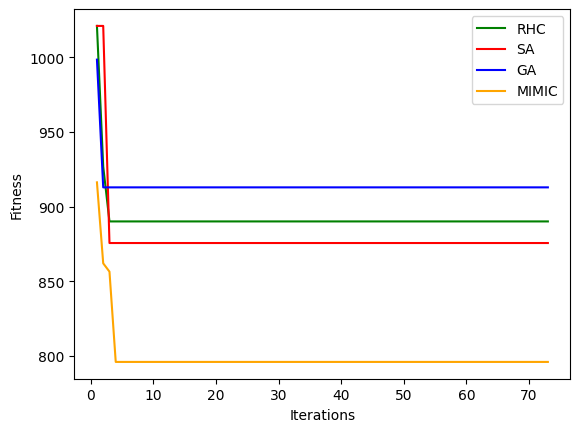

In [20]:

import matplotlib.pyplot as plt
#iterations = range(1, 101)
iterations=range(1,74)
plt.plot(iterations, rhc_fitness_list[0], label='RHC', color='green')
plt.plot(iterations, sa_fitness_list[0], label='SA', color='red')
plt.plot(iterations, ga_fitness_list[0], label='GA', color='blue')
plt.plot(iterations, mimic_fitness_list[0], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.savefig("results/fourpeaks_fitness.png")    



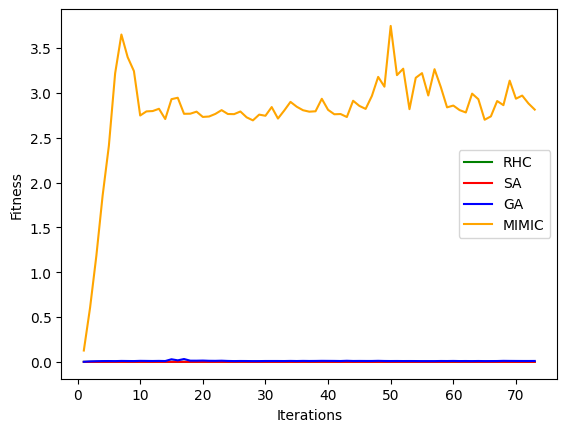

In [23]:
plt.plot(iterations, rhc_time_list, label='RHC', color='green')
plt.plot(iterations, sa_time_list, label='SA', color='red')
plt.plot(iterations, ga_time_list, label='GA', color='blue')
plt.plot(iterations, mimic_time_list, label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Runtime")
plt.savefig("results/fourpeaks_time.png")